# Analaysis of deep learning models segmentation performance for rescaled images
This notebook allows to compare the results obtained for segmentation and the ground truth across image resolutions. The notebook will compute the following metrics and provide plots to visualise the results: 
- Mean Intersection-over-Union (IoU) as described in the Cell Tracking Challenge (True positives identified with a minimum of 50% overlap).
- Object diameter
- Theoretical throughput

**Expected output**:
- A new folder (`Results`) in the main directory with `.csv`files containing the numerical data for the assessment.
- Images of true positives, false positives, and false negatives for each image.



## 1. Import dependencies

In [1]:
from rescale4dl.morphology import morphology
from rescale4dl.morphology import generate_binary_semantic_box_plot, generate_semantic_gt_pred_bar_plot,\
generate_instance_box_plot, generate_instance_gt_pred_bar_plot, generate_instance_wt_treatment_bar_plot
from rescale4dl.morphology import microscope_FOV_area, obj_per_microscope_FOV
import shutil
import os
import matplotlib.pyplot as plt
from tifffile import imread

## 2. Compile statistics
This cell will compute analytical measurements for all the datasets and rescaling factors contained in the given INPUT_DIR.
-  **INPUT_DIR**  
   - Path to the folder containing the input images and the annotations, stored as `.tiff`files.
   - The input directory is expected to have the following structure (preserving the naming for "GT" and "Prediction" folders)
        - **DATASET (e.g., Saureus_instance_segmentation)**
            * **OG**
                * GT
                    - images.tiff
                * Prediction
                    - images.tiff
            * **downsampling_2**
                * GT
                    - images.tiff
                * Prediction
                    - images.tiff
 
   - Example: `/path/to/your/input`

In [ ]:
# Directory with folders of sampling folders with GT and Prediction folder pairs inside
INPUT_DIR = '/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/segmentation_results'

# Calculate object properties statistics
morphology(INPUT_DIR)

### 2.1 Display some of the example results
Display an example ground truth labelling, the prediction and the difference between them. Expected input parameters:
1. **DATASET**  
   - Name of the dataset to display (e.g., `DATASET = "Saureus_instance_segmentation"`)
2. **SCALING**
   - Name of the folder corresponding to the scaling example to display (e.g., `SCALING = "downsampling_4"`)

In [ ]:
DATASET = "Saureus_instance_segmentation" # Name of the dataset
SCALING = "downsampling_4" # Name of the scaling folder

### PLOT EXAMPLES
example_images_dir = os.path.join(INPUT_DIR, DATASET, SCALING)
example_images_dir_GT = os.path.join(example_images_dir, "GT")
example_images_dir_Prediction = os.path.join(example_images_dir, "Prediction")
example_images_results_dir = os.path.join(INPUT_DIR, DATASET, "Results", SCALING)
example_image = [i for i in os.listdir(example_images_dir_GT) if i.__contains__("tif")][0]
example_image = example_image.split(".tif")[0]


## Display example images
plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(imread(os.path.join(example_images_dir_GT, f"{example_image}.tif")))
plt.axis(False)
plt.title("Ground Truth")
plt.subplot(1,5,2)
plt.imshow(imread(os.path.join(example_images_dir_Prediction,  f"{example_image}.tif")))
plt.title("Prediction")
plt.axis(False)
plt.subplot(1,5,3)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_true_positives.tif")))
plt.title("True positives")
plt.axis(False)
plt.subplot(1,5,4)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_false_positives.tif")))
plt.title("False positives")
plt.axis(False)
plt.subplot(1,5,5)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_false_negatives.tif")))
plt.title("False negatives")
plt.axis(False)
plt.show()

## 3. Plot analytical results

### 3.1 Semantic segmentation
Example dataset: "Deepbacs_Semantic_Segmentation" (The example in this section expects section 2 to have been executed with the example data)


**Expected parameters**
1. **ANALYSIS_DIR**
   - Main directory where the DATASET folder stores all the csv files for morphology
2. **DATASET**
   - Name of the dataset, which also corresponds with its folder name, e.g., `DATASET = "Deepbacs_Semantic_Segmentation"`
3. **IMAGE_SIZES**
   - Path to the csv file containing basic information about the dataset. For the example data in the `segmentation_results` folder, the csv file can be found at `segmentation_results/DATASET/DATASET_dataset_info.csv`. For the paper results in the `analysis_results`, the csv file can be found at `analysis_results/dataset_info.csv`
4. **ORIGINAL_DATASET_FOLDERNAME**
   - The name of the folder in DATASET that corresponds to the original data. `"OG"` for the example data in `segmentation_results`; `"og"` for the example data in `"analysis_results"`.
5. **OUTPUT_DIR**
   - A directory to save the plots.
  
**Expected plots**
- IoU and Theoretical Throughput accross scales
- Barplot with diameter distributions for the ground truth and the segmentation results

In [10]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/segmentation_results"
DATASET = "Deepbacs_Semantic_Segmentation"
IMAGE_SIZES = os.path.join(ANALYSIS_DIR,DATASET, f"{DATASET}_dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "OG" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET, "Results", "plots")

**Run**

DONE!
DONE!
DONE!


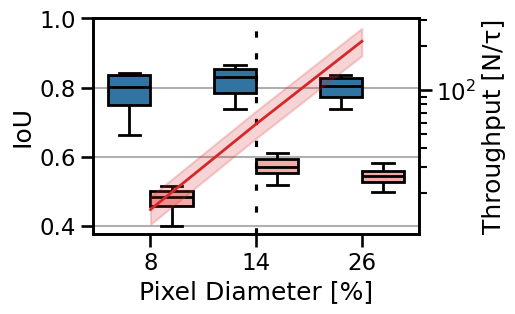

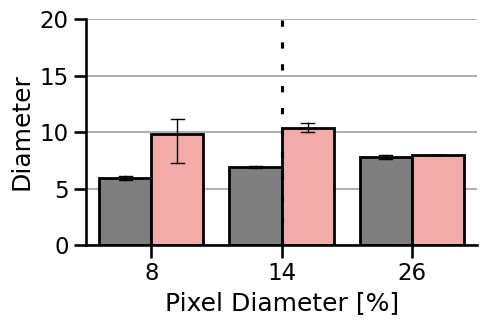

In [11]:
## Run
dataset_name_match_dict = {DATASET: DATASET}
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Boxplot of accuracy metrics
generate_binary_semantic_box_plot(ANALYSIS_DIR,
                                  DATASET,
                                DATASET,
                                fig_name, 
                                y_axis, 
                                thoughput_plot=True, 
                                y_axis_2 = "Obj_per_FOV_mean",
                                metrics_csv_path=IMAGE_SIZES,
                                original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                                dataset_name_match_dict=dataset_name_match_dict,
                                output_path=OUTPUT_DIR)
## Barplot of the diameter
fig_name = f"Diameter barplot for {DATASET}"
generate_semantic_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)

### 3.2 Instance segmentation
Example dataset = "Saureus_instance_segmentation" and "Saureus_instance_segmentation_pc190723"

**Expected parameters**
1. **ANALYSIS_DIR**
   - Main directory where the DATASET folder stores all the csv files for morphology
2. **DATASET**
   - Name of the dataset, which also corresponds with its folder name, e.g., `DATASET = "Saureus_instance_segmentation"`
3. **IMAGE_SIZES**
   - Path to the csv file containing basic information about the dataset. For the example data in the `segmentation_results` folder, the csv file can be found at `segmentation_results/DATASET/DATASET_dataset_info.csv`. For the paper results in the `analysis_results`, the csv file can be found at `analysis_results/dataset_info.csv`
4. **ORIGINAL_DATASET_FOLDERNAME**
   - The name of the folder in DATASET that corresponds to the original data. `"OG"` for the example data in `segmentation_results`; `"og"` for the example data in `"analysis_results"`.
5. **OUTPUT_DIR**
   - A directory to save the plots.

In [15]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/segmentation_results"
DATASET = "Saureus_instance_segmentation"
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, DATASET, f"{DATASET}_dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "OG" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET, "Results", "plots")

DONE!
DONE!
DONE!


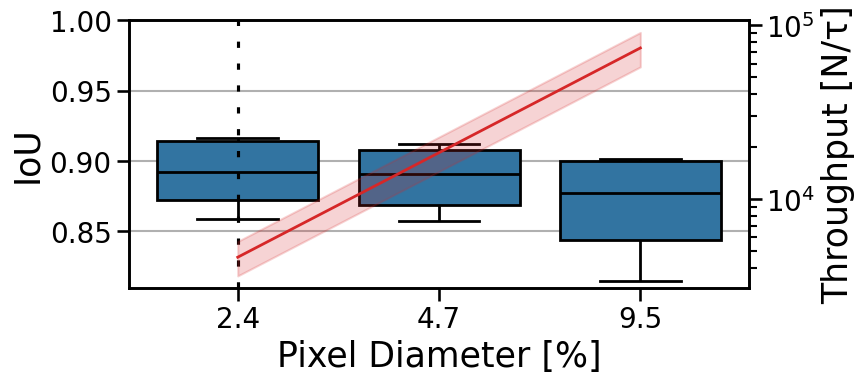

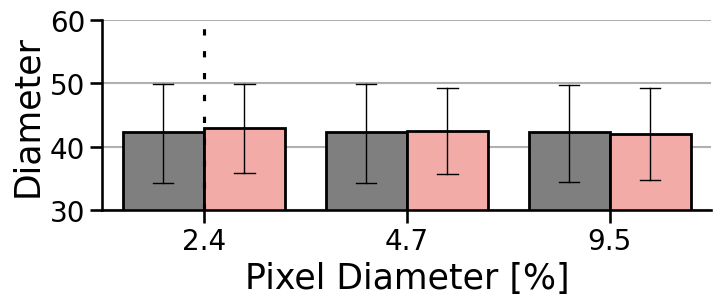

In [20]:
##
dataset_name_match_dict = {DATASET: DATASET}
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Boxplot of accuracy metrics
generate_instance_box_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           y_axis, 
                           thoughput_plot=True, 
                           y_axis_2 = "Obj_per_FOV_mean",
                           metrics_csv_path=IMAGE_SIZES,
                           original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                           dataset_name_match_dict=dataset_name_match_dict,
                           output_path=OUTPUT_DIR)
## Barplot of the diameter
fig_name = f"Diameter distribution {DATASET}"
generate_instance_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)

## 4. Reproduce the plots from the manuscript (Optional)
We provide the results obtained with the experiments in ReScale4DL publication that can be used to reproduce the original plots in the publication. These are stored in ReScale4DL repository at `Examples/analysis_results`. 

Provide the following parameters on each of the examples: 
1. **DATASET**
    - One of the following ones:
        - `"Saureus_instance_segmentation", "Deepbacs_Instance_Segmentation", "Deepbacs_Semantic_Segmentation", "Saureus_instance_segmentation_pc190723", "Saureus_instance_segmentation", "Worm_Semantic_Segmentation"`
3. **ANALYSIS_DIR**
    - The absolute path to `"Examples/analysis_results"`


### 4.1 Semantic Segmentation with DeepBacs

DONE!
DONE!
DONE!


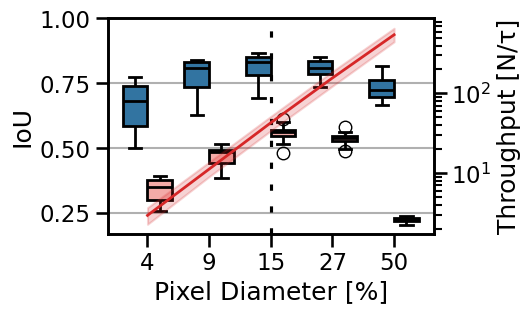

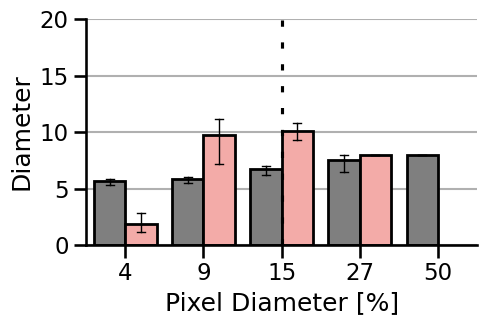

In [29]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Deepbacs_Semantic_Segmentation"

## Unzip the data
filename = os.path.join(ANALYSIS_DIR, f"{DATASET}.zip")
extract_dir = os.path.join(ANALYSIS_DIR)
shutil.unpack_archive(filename, extract_dir)

## Plotting default params
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, "dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "og" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")
dataset_name_match_dict = {DATASET: DATASET}
os.makedirs(OUTPUT_DIR, exist_ok=True)

fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

## Boxplot of accuracy metrics
generate_binary_semantic_box_plot(ANALYSIS_DIR,
                                  DATASET,
                                DATASET,
                                fig_name, 
                                y_axis, 
                                thoughput_plot=True, 
                                y_axis_2 = "Obj_per_FOV_mean",
                                metrics_csv_path=IMAGE_SIZES,
                                original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                                dataset_name_match_dict=dataset_name_match_dict,
                                output_path=OUTPUT_DIR)
## Barplot of the diameter
fig_name = f"Diameter barplot for {DATASET}"
generate_semantic_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)

### 4.2 Instance Segmentation with S. aureus

DONE!
DONE!
DONE!


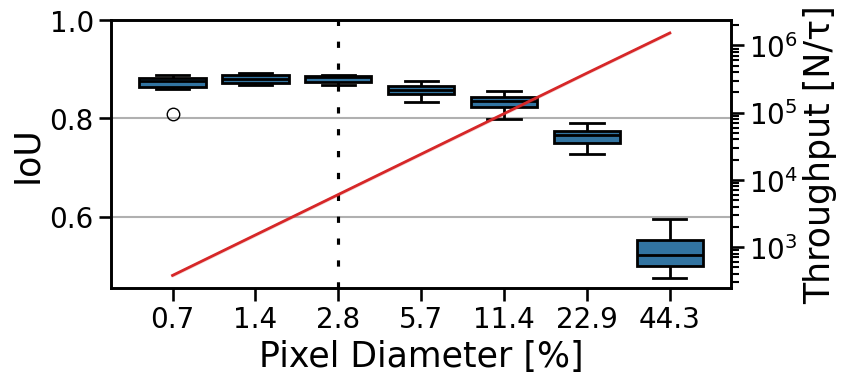

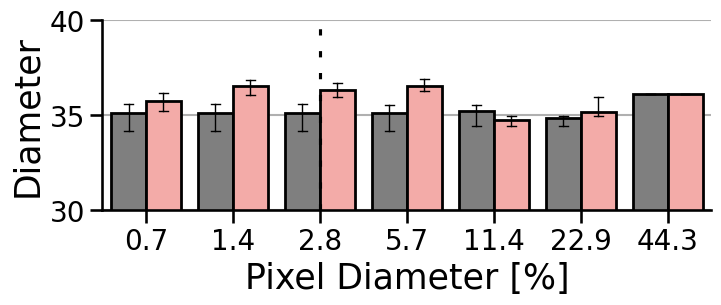

In [28]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Saureus_instance_segmentation"

## Unzip the data
filename = os.path.join(ANALYSIS_DIR, f"{DATASET}.zip")
extract_dir = os.path.join(ANALYSIS_DIR)
shutil.unpack_archive(filename, extract_dir)

## Plotting default params
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, "dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "og" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")
dataset_name_match_dict = {DATASET: DATASET}
os.makedirs(OUTPUT_DIR, exist_ok=True)

fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

## Plot boxplot
generate_instance_box_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           y_axis, 
                           thoughput_plot=True, 
                           y_axis_2 = "Obj_per_FOV_mean",
                           metrics_csv_path=IMAGE_SIZES,
                           original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                           dataset_name_match_dict=dataset_name_match_dict,
                           output_path=OUTPUT_DIR)

## Plot barplot
fig_name = f"Diameter distribution {DATASET}"
generate_instance_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)

### 4.3 Diameter comparison for WT and treated S. aureus

DONE!
DONE!
DONE!
DONE!


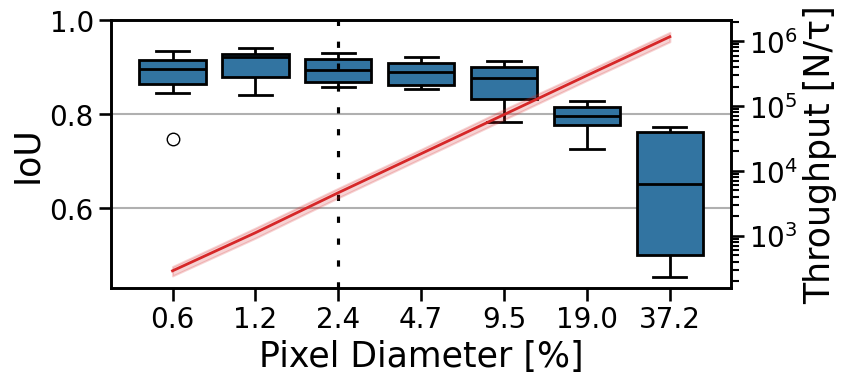

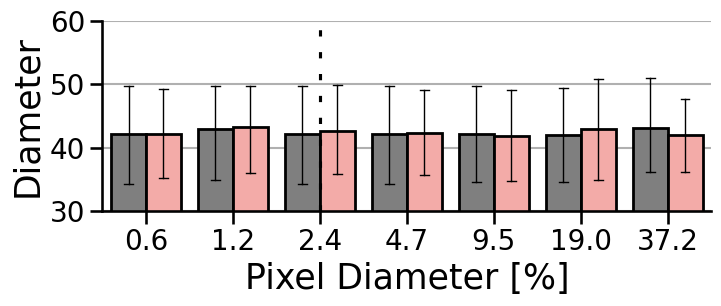

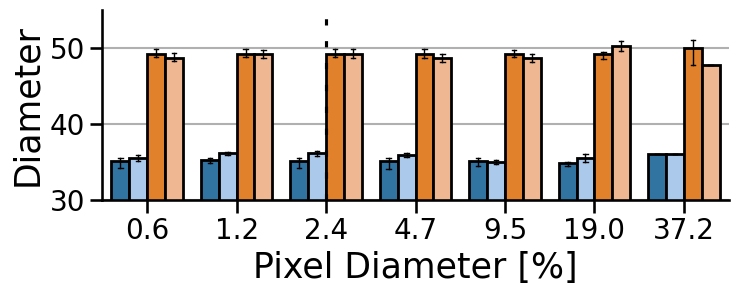

In [2]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Saureus_instance_segmentation_pc190723"

## Unzip the data
filename = os.path.join(ANALYSIS_DIR, f"{DATASET}.zip")
extract_dir = os.path.join(ANALYSIS_DIR)
shutil.unpack_archive(filename, extract_dir)


## Plotting default params
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, "dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "og" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")
dataset_name_match_dict = {DATASET: DATASET}
os.makedirs(OUTPUT_DIR, exist_ok=True)

fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

## Plot boxplot
generate_instance_box_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           y_axis, 
                           thoughput_plot=True, 
                           y_axis_2 = "Obj_per_FOV_mean",
                           metrics_csv_path=IMAGE_SIZES,
                           original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                           dataset_name_match_dict=dataset_name_match_dict,
                           output_path=OUTPUT_DIR)

## Plot barplot
fig_name = f"Diameter distribution {DATASET}"
generate_instance_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)

## Barplot for groups
antibiotic_samples = ["1.tif", "11.tif", "12.tif", "13.tif", "14.tif", "8.tif"]
generate_instance_wt_treatment_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           antibiotic_samples,
                           output_path=OUTPUT_DIR)